<a href="https://colab.research.google.com/github/manashpratim/Urban-Sound-Classification/blob/master/Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the Datasets
!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/train_file/train_fuSp8nd.csv"\
      -O "/tmp/train.csv"

!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/test_file/test_B0QdNpj.csv"\
      -O "/tmp/test.csv"

--2019-07-13 04:05:51--  https://datahack-prod.s3.amazonaws.com/train_file/train_fuSp8nd.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.36
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94844 (93K) [text/csv]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]  92.62K   432KB/s    in 0.2s    

2019-07-13 04:05:52 (432 KB/s) - ‘/tmp/train.csv’ saved [94844/94844]

--2019-07-13 04:05:58--  https://datahack-prod.s3.amazonaws.com/test_file/test_B0QdNpj.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.20
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19402 (19K) [text/csv]
Saving to: ‘/tmp/test.csv’

/tmp/test.csv       100%[===================>]  18.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#I have downloaded the data to my Google Drive. Unzipping the train and test folders containing the audio
import os
import zipfile

local_zip='/content/drive/My Drive/dataset/train.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/train')
zip_ref.close()


local_zip='/content/drive/My Drive/dataset/test.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()


In [0]:
#Importing the csv files that contains the labels of the sounds
import pandas as pd
train=pd.read_csv('/tmp/train.csv')
test=pd.read_csv('/tmp/test.csv')

In [2]:
train.tail(5)

,ID,Class
5430,8725,engine_idling
5431,8726,dog_bark
5432,8727,engine_idling
5433,8728,engine_idling
5434,8729,air_conditioner


Class Distribution:
 jackhammer          668
engine_idling       624
siren               607
street_music        600
children_playing    600
dog_bark            600
drilling            600
air_conditioner     600
car_horn            306
gun_shot            230
Name: Class, dtype: int64


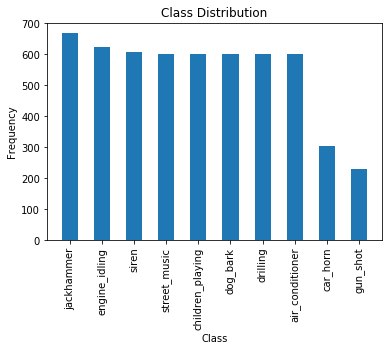

In [3]:
#Class Distribution
train['Class'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Class'].value_counts().index, train['Class'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Class Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Frequency')
print('Class Distribution:\n',train['Class'].value_counts())

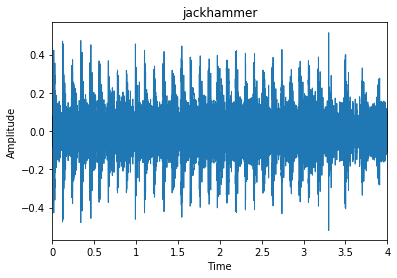

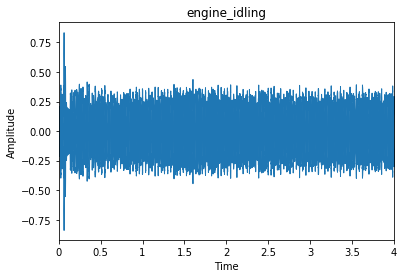

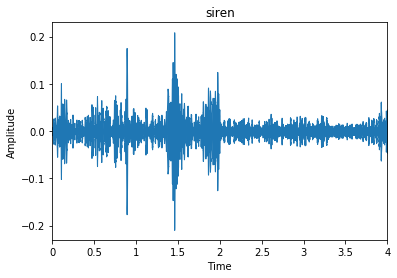

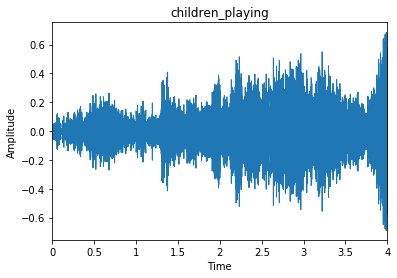

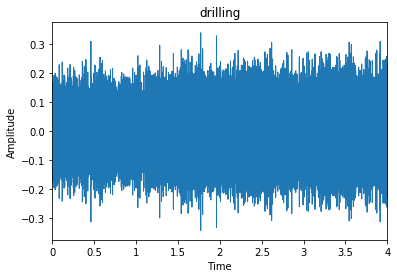

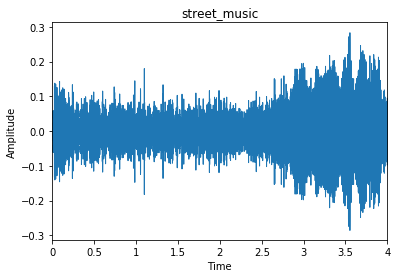

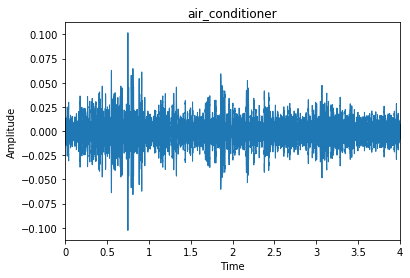

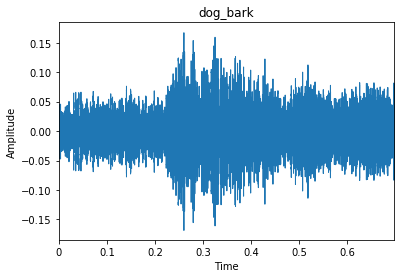

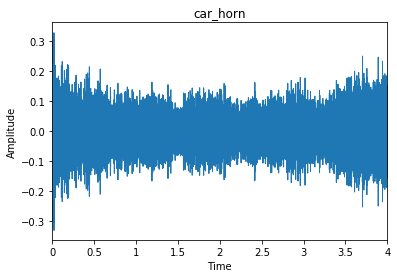

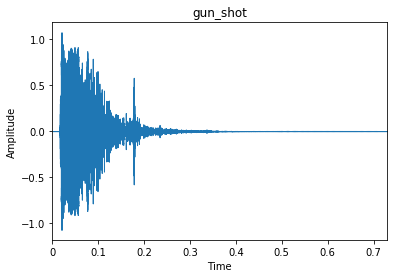

In [4]:
#Let's visualize the sound files of different classes
Classes=['jackhammer','engine_idling','siren','children_playing','drilling','street_music','air_conditioner','dog_bark','car_horn','gun_shot']

import librosa
import librosa.display
import random

def get_index(c): #function to randomize the index of the classes
  return random.choice(train.loc[train.Class==c].index)

for i in range(len(Classes)):
  j=get_index(Classes[i])
  x, sr = librosa.load('/tmp/train/Train/' + str(train.ID[j]) + '.wav')

  plt.figure(figsize=(6, 4))
  librosa.display.waveplot(x, sr=sr)
  plt.ylabel('Amplitude')
  plt.title(train.Class[j])
  plt.pause(0.05)


  
plt.show()

In [0]:
#getting the features and labels of audios in the train set
features=[]
labels=[]
for i in range(len(train)):
  filename='/tmp/train/Train/' + str(train.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  features.append(np.mean(librosa.feature.mfcc(x, sr=sample_rate, n_mfcc=40).T,axis=0))
  labels.append(train.Class[i])


In [0]:
#getting the features of audios in the test set
features_test=[]
for i in range(len(test)):
  filename='/tmp/test/Test/' + str(test.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  features_test.append(np.mean(librosa.feature.mfcc(x, sr=sample_rate, n_mfcc=40).T,axis=0))

In [10]:
#converting the audio features to numpy array
x=np.array(features)
x_test=np.array(features_test)

#encoding the labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y = to_categorical(le.fit_transform(labels)) 

Using TensorFlow backend.


In [11]:
#Dimension of Data
print('Shape of Features(Train): ',x.shape)
print('Shape of Features(Test): ',x_test.shape)
print('Shape of Labels(Train): ',y.shape)

Shape of Features(Train):  (5435, 40)
Shape of Features(Test):  (3297, 40)
Shape of Labels(Train):  (5435, 10)


## **Multilayer Perceptron Model (MLP)**

In [0]:
import tensorflow as tf
#from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(256,activation='relu',input_shape=(40,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10,activation='softmax')
])

In [15]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(x,y, batch_size=32, epochs=100, validation_split=0.1,callbacks=[reduce])

Train on 4891 samples, validate on 544 samples
Epoch 1/100
4891/4891 [==============================] - 1s 295us/sample - loss: 11.3329 - acc: 0.1846 - val_loss: 2.2032 - val_acc: 0.1912
Epoch 2/100
4891/4891 [==============================] - 0s 95us/sample - loss: 2.4632 - acc: 0.2088 - val_loss: 2.1961 - val_acc: 0.1985
Epoch 3/100
4891/4891 [==============================] - 0s 92us/sample - loss: 2.2153 - acc: 0.2355 - val_loss: 2.0872 - val_acc: 0.2776
Epoch 4/100
4891/4891 [==============================] - 0s 93us/sample - loss: 2.0731 - acc: 0.2742 - val_loss: 1.9501 - val_acc: 0.3382
Epoch 5/100
4891/4891 [==============================] - 0s 89us/sample - loss: 1.9678 - acc: 0.3024 - val_loss: 1.8201 - val_acc: 0.3658
Epoch 6/100
4891/4891 [==============================] - 0s 87us/sample - loss: 1.8621 - acc: 0.3378 - val_loss: 1.7063 - val_acc: 0.4265
Epoch 7/100
4891/4891 [==============================] - 0s 89us/sample - loss: 1.7756 - acc: 0.3619 - val_loss: 1.5878 - v

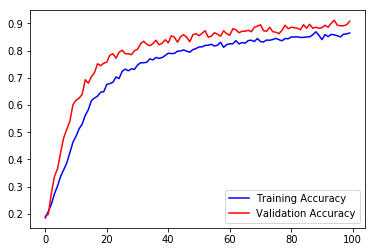

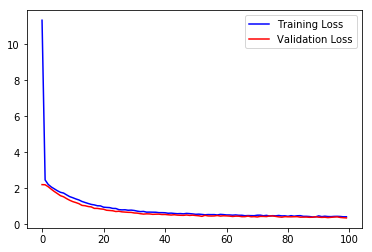

In [16]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

### **The model achieves a validation accuracy of over 90% and from the graph above, we can see that there is no overfitting.**

In [0]:
#Determining the classes of the audios in the test set. We do not have the labels for the test set. I will generate a submission file that would contain the ID
#and classes of the samples in the test set. The accuracy of the test set can be known by submitting to the analytics vidya challenge. 
pred1=model1.predict(x_test)
b=np.argmax(pred1,axis=1)
pred_test=le.inverse_transform(b)

In [0]:
#Generating the Class of the audios for the Test set and saving in a .csv file
out_df = pd.DataFrame({'ID':test['ID'].values})
out_df .insert(loc=0, column='Class', value=pred_test)
out_df.to_csv('submission1.csv', index=False)

In [19]:
#Viewing the test file
s=pd.read_csv('submission1.csv')
s.head(5)

,Class,ID
0,drilling,5
1,dog_bark,7
2,drilling,8
3,children_playing,9
4,engine_idling,13


## **Convolutional Neural Network (CNN)**

In [0]:
#Here, I am extracting the mfccs for 10 audio samples
mfccs=[]
for i in range(len(train[:10])):
  file_name='/tmp/train/Train/' + str(train.ID[i+100]) + '.wav'
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mfccs.append(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40))

In [38]:
#Each of the samples has 40 rows but variable number of columns
for i in range(len(mfccs)):
  print(len(mfccs[i][0]))

173
99
173
173
173
95
173
173
173
127


In [63]:
#CNN doesnot support variable column length. We will have to fix the column length and pad them
max_pad_len=174 # I am defining a maximum length for each column 

file_name='/tmp/train/Train/12.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfcc=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print('Shape of feature matrix: ',mfcc.shape)
pad_width = max_pad_len - mfcc.shape[1]
print('Pad width: ',pad_width)
mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
print('Shape of feature matrix after padding: ',mfcc.shape)

Shape of feature matrix:  (40, 50)
Pad width:  124
Shape of feature matrix after padding:  (40, 174)


In [0]:
#Let's do the stuff mentioned above for all the training samples
features_new=[]
labels=[]
max_pad_len=174 

for i in range(len(train)):
  filename='/tmp/train/Train/' + str(train.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  mfcc=librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40)
  pad_width = max_pad_len - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  features_new.append(mfcc)
  labels.append(train.Class[i])

In [0]:
#Let's do the stuff mentioned above for all the test samples
features_new_test=[]
max_pad_len=174 

for i in range(len(test)):
  filename='/tmp/test/Test/' + str(test.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  mfcc=librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40)
  pad_width = max_pad_len - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  features_new_test.append(mfcc)

In [7]:
x_new=np.array(features_new)  #coverting the features vector to a numpy array
x_new=x_new.reshape(x_new.shape[0], 40, 174, 1) #reshaping the array for the convolution layer input

x_new_test=np.array(features_new_test)  
x_new_test=x_new_test.reshape(x_new_test.shape[0], 40, 174, 1)

#encoding the labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

Using TensorFlow backend.


In [8]:
#Dimension of Data
print('Shape of Features(Train): ',x_new.shape)
print('Shape of Features(Test): ',x_new_test.shape)
print('Shape of Labels(Train): ',y.shape)

Shape of Features(Train):  (5435, 40, 174, 1)
Shape of Features(Test):  (3297, 40, 174, 1)
Shape of Labels(Train):  (5435, 10)


In [0]:
import tensorflow as tf
#from keras import regularizers

model2=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(40,174,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(256,activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10,activation='softmax')
])

In [18]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2=model2.fit(x_new,y, batch_size=32, epochs=100, validation_split=0.1,callbacks=[reduce])

Train on 4891 samples, validate on 544 samples
Epoch 1/100
4891/4891 [==============================] - 3s 617us/sample - loss: 2.3786 - acc: 0.2723 - val_loss: 1.7247 - val_acc: 0.3915
Epoch 2/100
4891/4891 [==============================] - 2s 478us/sample - loss: 1.4962 - acc: 0.4651 - val_loss: 1.3824 - val_acc: 0.5276
Epoch 3/100
4891/4891 [==============================] - 2s 478us/sample - loss: 1.1804 - acc: 0.5796 - val_loss: 1.0879 - val_acc: 0.6654
Epoch 4/100
4891/4891 [==============================] - 2s 472us/sample - loss: 0.9488 - acc: 0.6680 - val_loss: 0.8913 - val_acc: 0.7298
Epoch 5/100
4891/4891 [==============================] - 2s 478us/sample - loss: 0.7992 - acc: 0.7324 - val_loss: 0.7897 - val_acc: 0.7500
Epoch 6/100
4891/4891 [==============================] - 2s 478us/sample - loss: 0.6386 - acc: 0.7880 - val_loss: 0.6127 - val_acc: 0.7904
Epoch 7/100
4891/4891 [==============================] - 2s 477us/sample - loss: 0.5634 - acc: 0.8117 - val_loss: 0.550

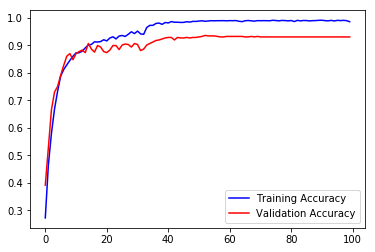

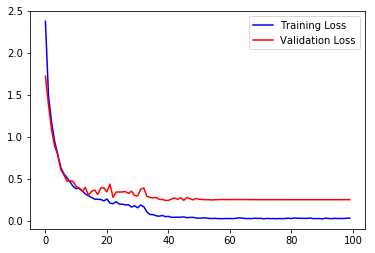

In [22]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
#Determining the classes of the audios in the test set. We do not have the labels for the test set. I will generate a submission file that would contain the ID
#and classes of the samples in the test set. The accuracy of the test set can be known by submitting to the analytics vidya challenge. 
pred2=model2.predict(x_new_test)
b=np.argmax(pred2,axis=1)
pred_test2=le.inverse_transform(b)

In [0]:
#Generating the Class of the audios for the Test set and saving in a .csv file
out_df = pd.DataFrame({'ID':test['ID'].values})
out_df .insert(loc=0, column='Class', value=pred_test2)
out_df.to_csv('submission2.csv', index=False)

In [21]:
#Viewing the test file
s=pd.read_csv('submission2.csv')
s.head(5)

,Class,ID
0,jackhammer,5
1,dog_bark,7
2,drilling,8
3,dog_bark,9
4,street_music,13
